# Q1

(-1.3791510103387132, -0.7713126942116478)
(0.8059622306566931, 1.0554749470059377)


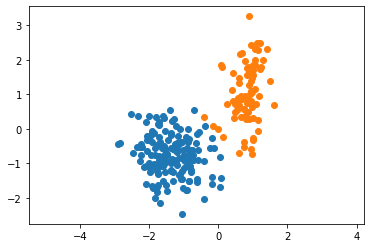

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
#df = pd.read_csv("d1.csv")
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

#fig, ax = plt.subplots()
#ax.scatter(x1, x2)
#plt.axis("equal")
#plt.show()


m11 = -1
m12 = -1
m21 = 2
m22 = 1

n = x1.size

cl = np.zeros((n))

for i in range(5):
  n1 = 0
  tot11 = 0
  tot12 = 0
  n2 = 0
  tot21 = 0
  tot22 = 0
  #allocate each point to its nearest mean
  for p in range(n):
    l1 = (x1[p] - m11)**2 + (x2[p] - m12)**2
    l2 = (x1[p] - m21)**2 + (x2[p] - m22)**2
    if l1 < l2:
      n1 = n1 + 1
      tot11 = tot11 + x1[p]
      tot12 = tot12 + x2[p]
      cl[p] = 1
    else:
      n2 = n2 + 1
      tot21 = tot21 + x1[p]
      tot22 = tot22 + x2[p]
      cl[p] = 2
  
  #get new mean
  m11 = tot11/n1
  m12 = tot12/n1
  m21 = tot21/n2
  m22 = tot22/n2

print((m11,m12))  
print((m21,m22))  

fig, ax = plt.subplots()
ax.scatter(x1[cl == 1], x2[cl == 1])
ax.scatter(x1[cl == 2], x2[cl == 2])
plt.axis("equal")
plt.show()

# Q2 (a)


In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#get mean for class 1
n1 = 0
tot11 = 0
tot12 = 0
n2 = 0
tot21 = 0
tot22 = 0

for p in range(n):
  if clTrue[p] == 1:
    n1 = n1 + 1
    tot11 = tot11 + x1[p]
    tot12 = tot12 + x2[p]
  else:
    n2 = n2 + 1
    tot21 = tot21 + x1[p]
    tot22 = tot22 + x2[p]

m11 = tot11/n1
m12 = tot12/n1
m21 = tot21/n2
m22 = tot22/n2


stot11 = 0
stot12 = 0
stot21 = 0
stot22 = 0

#get std
for p in range(n):
  if clTrue[p] == 1:
    stot11 = stot11 + (x1[p] - m11)**2
    stot12 = stot12 + (x2[p] - m12)**2
  else:
    stot21 = stot21 + (x1[p] - m21)**2
    stot22 = stot22 + (x2[p] - m22)**2

s11 = np.sqrt(stot11/n1)
s12 = np.sqrt(stot12/n1)
s21 = np.sqrt(stot21/n2)
s22 = np.sqrt(stot22/n2)
#Note there are much more efficient ways of doing this!

print(m11,m12)
cov1 = np.array([[s11**2,0],[0,s12**2],])
print(cov1)
print()
print(m21,m22)
cov2 = np.array([[s21**2,0],[0,s22**2],])
print(cov2)

-1.349203074997494 -0.7520203552752851
[[0.36348015 0.        ]
 [0.         0.35494227]]

0.8515785301063732 1.105818108827046
[[0.07902776 0.        ]
 [0.         0.67727456]]


# Q2 (b)

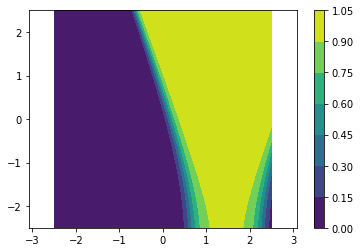

In [ ]:
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))


Xgrid,x1line,x2line = gen_sample_grid(200,200,2.5)

covar1 = np.array([[s11**2, 0], [0, s12**2]])
covar2 = np.array([[s21**2, 0], [0, s22**2]])

pxw1 = prob_density_2d(Xgrid,m11,m12,covar1)
pxw2 = prob_density_2d(Xgrid,m21,m22,covar2)

#probability of each independently comes from the dataset
Pw1 = n1/n
Pw2 = n2/n

evidence = Pw1 * pxw1 + Pw2 * pxw2
pw1x = Pw1 * pxw1 / evidence
pw2x = Pw2 * pxw2 / evidence

pgrid = np.reshape(pw2x, [200, 200])
pred_class = (pgrid > 0.5) + 1

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, pgrid)
plt.axis("equal")
plt.colorbar()
plt.show()

# Q2(c)

The principal components will be aligned with each axis, i.e. horizontal and vertical. This is because there is no covariance between the two datasets, so the principal directions of variation must be aligned with the two parameters.

#Q2(d)

No - the result will not be reliable. This point is well away from the training data given, so effectively the normal distribution will be extrapolating into an area of very low probability. 

# Q3

3.076160301503033 2.682196447130425 3.851488253801928


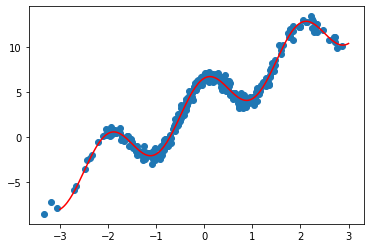

In [ ]:
#df = pd.read_csv("d3.csv")
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']

#turn it into a 2 parameter problem:
xc = np.cos(np.pi*x)

A_mat = np.array([[np.sum(x ** 2), np.dot(x, xc), np.sum(x) ], 
              [np.dot(x, xc), np.sum(xc ** 2), np.sum(xc) ],
              [np.sum(x), np.sum(xc), len(x)]])
B_vect = np.array([np.dot(x, y), np.dot(xc, y), np.sum(y)]).T

beta = np.linalg.solve(A_mat, B_vect)

A = beta[0]
B = beta[1]
C = beta[2]

print(A,B,C)

xTest = np.linspace(-3, 3, 200)
yTest = A*xTest + B*np.cos(np.pi*xTest) + C

fig, ax = plt.subplots()
plt.scatter(x,y)
plt.plot(xTest,yTest,'r-')

#Q4 (a)

y = 2.5x + -1.25


(-0.05, 1.05, -1.375, 1.375)

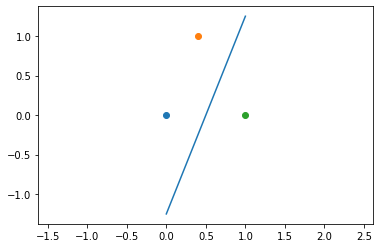

In [ ]:
a = np.array([0, 0])
b = np.array([0.4, 1])
c = np.array([1, 0])

d = b - a
dn = d/np.linalg.norm(d)
#print(dn)

#overly complicated way of doing it!
#e = np.array([dn[1], -dn[0]])
#dist = np.dot(e,c - a)

#point on boundary must be at
#p0 = a + dist*0.5 * e

p0 = 0.5*(a+c)
#gradient given by d..

M = d[1]/d[0]

C = p0[1] - p0[0]*M

print("y = "+str(M)+"x + "+str(C))

#sanity check plot:
xvals = np.linspace(0, 1)
yvals = M*xvals + C

fig, ax = plt.subplots()
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])
plt.scatter(c[0],c[1])
plt.plot(xvals,yvals)
plt.axis("equal")

# Q4 (b)

Would have to move point (0,0) directly beneath the point at (0.4, 1) to turn into a 2 support vector problem, i.e. to (0.4, 0).